In [285]:
from PIL import Image
import numpy as np

file_path = 'E:\SamplePhotos\P1240040.jpg' # defien file path
im = Image.open(file_path) # import pictuate as Pillow Image object
pix = np.array(im) # convert to Numpy aray
h, w, d = orig_shape = tuple(pix.shape) # store original shape of array
pix_flat = np.reshape(pix, (h*w, d)) # flatten image for clustering
print(file_path)

E:\SamplePhotos\P1240040.jpg


In [286]:
## initiate sklearnex
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.cluster import KMeans # import K means
import matplotlib.pyplot as plt

no_clusters = 5 # start clustering from 5 clusters
clusterMin = 1 # set cluster min at 1 to enter while loop
while clusterMin > 0.01: # continue to increase number of clusters until the smallest cluster becomes suficently small to just be stripes
    print(no_clusters)
    kmeans = KMeans(n_clusters = no_clusters) # define cluster object
    cluster = kmeans.fit(pix_flat) # find clusters
    labels = cluster.labels_ # save cluster labels as a list
    percent = np.unique(labels, return_counts=True) # get counts # pixels in each cluster
    stripeColour = np.where(percent[1] == min(percent[1])) # return label of least frequent pixel
    clusterMin = min(percent[1]) / (h*w) # find fraction of picture occupied by smallest cluster
    print(clusterMin)
    no_clusters += 1 # increase cluster counter by 1

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


5
0.07253825
6
0.07170616666666667
7
0.006712333333333333
8
0.006723416666666667
9
0.006635166666666667
10
0.006624916666666667
11
0.0065759166666666665
12
0.006575333333333333
13


KeyboardInterrupt: 

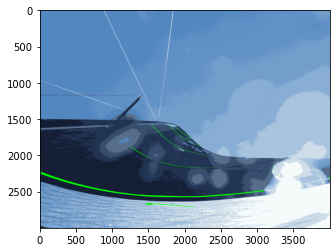

In [287]:
kmeans_image = cluster.cluster_centers_ # save cluster centres to plot image to check clusters
kmeans_image[stripeColour] = np.asarray([0,255,0]) # change the stripe cluster centre to lime green
kmeans_image = cluster.cluster_centers_[cluster.labels_] # assign each pixcel itc cluster colour
kmeans_image = np.reshape(kmeans_image, orig_shape) # reshape array for plotting
plt.imshow(kmeans_image.astype('uint8')) # plot image
plt.show()


In [288]:
vert_ex = 1
labels = np.reshape(labels,(h,w)) # reshape labels array in 2d array (like picture)
stripes = np.where(labels == stripeColour) # get coordinates of all pixels which are a stripe colour
stripes = np.asarray(stripes) # build 2d array of stripe coordinates for clustering
stripes = np.transpose(stripes) # transpose array so as cordinates are pairs
stripes_Vexagerated = np.copy(stripes) # move coordinates into V-Exagerate
stripes_Vexagerated[:,0] = stripes_Vexagerated[:,0] * vert_ex # apply vertical exageration

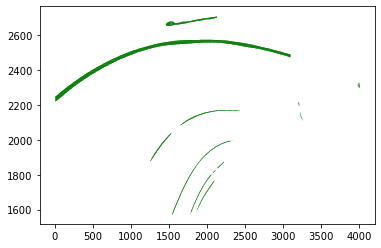

In [289]:
plt.plot(stripes_Vexagerated[:,1], stripes_Vexagerated[:,0], 'o', markersize=0.01, color='green') # create scatter plot of vertical exagerated stripes

In [290]:
stripes_single = np.copy(stripes[np.lexsort((stripes[:,0], stripes[:,1]))]) # sort stripes array by column values and then the row values
start_stop = np.where(np.diff(stripes_single[:,0], axis=0) != 1) # return index of locations where the difference between elements is not 1
start_stop = list(start_stop[0]) # convert start_stop to list
start_stop.insert(0,0) # insert a leading zero to mark start of first stripe
ind = [int(sum(start_stop[m:m+2])/2) for m in range(0, len(start_stop), 2)] # list comprehension --> finds the average of each index pair, converts to integer
stripes_single = np.copy(stripes_single[ind,:]) # slice single value for each stripe and move into stripes single

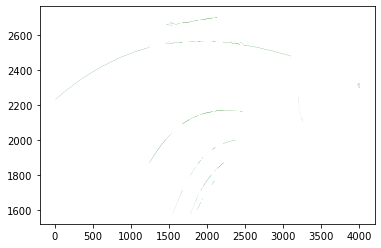

In [278]:
plt.plot(stripes_single[:,1], stripes_single[:,0], 'o', markersize=0.01, color='green') # create scatter plot of vertical exagerated stripes

In [291]:
from sklearn.cluster import DBSCAN # import DB Scan
distance = 100 # set inital eps (distance to jump in clustering) to 25
repeated_cluster = True # set to true to enter while loop
while repeated_cluster:
    print(distance)
    stripe_clusters = DBSCAN(eps=distance, min_samples=1).fit(stripes_Vexagerated) # fit clusters using DB SCAN



    assesment_array = np.empty([h,w]) # make empty array to build an array to asses if each vertical has all unique values
    assesment_array[:] = np.nan
    for i in range(len(stripes_single[:,0])): # iterate over all stripe coridnates
        n = stripes_single[i,0] # assign n the row number of the stripe
        n = int(n/vert_ex)
        m = stripes_single[i,1] # assign m the column number of the stripe
        x = np.where(stripes[:,0] == n)
        y = np.where(stripes[:,1] == m)
        lab_ind = np.intersect1d(x,y)
        if stripe_clusters.labels_[lab_ind] != -1: # dont assing lable to outliers
            assesment_array[n,m] = stripe_clusters.labels_[lab_ind] # assign the label

    repeated_cluster = np.where(np.diff(np.sort(assesment_array, axis=0), axis=0) == 0) # check if columns have alot of the same cluster
    repeated_cluster = len(repeated_cluster[0]) > 3 # if no more than 10 repeated clusters break while loop
    distance -= 5

100
95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


ValueError: eps must be positive.

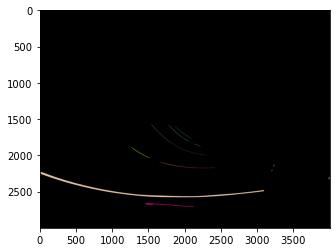

In [292]:
colours = [] # empty list to build colour for each cluster in
counter = 0
while counter < len(np.unique(stripe_clusters.labels_)): # build enough colour for each cluster
    colours.append(np.random.choice(range(256), size = 3)) # make random colour
    counter += 1
colours = np.array(colours) # convert colours to array
colours = colours[stripe_clusters.labels_] # assign colours to each test stripe

assesment_image = np.empty(orig_shape) # make empty array to build image of stripe clusters in
for i in range(len(stripes_Vexagerated[:,0])): # iterate over all stripe coridnates
    n = stripes_Vexagerated[i,0] # assign n the row number of the stripe
    n = int(n/vert_ex) # remove vertical exageration
    m = stripes_Vexagerated[i,1] # assign m the column number of the stripe
    assesment_image[n,m] = colours[i,:] # assign the label

plt.imshow(assesment_image.astype('uint8')) # plot image
plt.imsave('stripes.png', assesment_image.astype('uint8'))

In [ ]:
## regres spline to single line by clusters

